<a href="https://colab.research.google.com/github/DaniGa-Mo/IA_Ciencia_de_Datos/blob/main/Desafios_Zoop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📂 **Desafío: Zoop Pay**

## 1. Concatenación de tablas

Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [1]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

## **Prompt_1**

Vamos a actuar como analistas de datos de un e-commerce. Recibimos tres bases de datos con la información de los clientes y ventas en 2023 y qué clientes están pre-registrados en Zoop Pay, respectivamente.

Vamos a comenzar uniendo las dos primeras bases de nuestro proyecto ("ventas" y "clientes") en un DataFrame llamado "df" utilizando como clave la columna "ID_compra". Además, vamos a organizar las columnas en la siguiente secuencia:

["ID_compra", "fecha", "hora", "categoría", "precio_unitario", "cantidad", "envio", "metodo_pago", "ID_cliente", "edad", "sexo_biologico", "ciudad", "estado", "region", "cashback", "nota"]

Copia el código
Construye un código para ejecutar esta etapa usando Python y la biblioteca Pandas.

In [5]:
ventas = pd.read_csv(url_ventas)
clientes = pd.read_csv(url_clientes)

In [6]:
import pandas as pd

# Ejemplo de cómo cargar los DataFrames, si es necesario:
# ventas = pd.read_csv('ruta_al_archivo_de_ventas.csv')
# clientes = pd.read_csv('ruta_al_archivo_de_clientes.csv')

# Uniendo las bases "ventas" y "clientes" usando la columna "ID_compra" como clave
df = pd.merge(ventas, clientes, on="ID_compra")

# Organizando las columnas en la secuencia especificada
columnas_ordenadas = ["ID_compra", "fecha", "horario", "categoria", "precio_unitario", "cantidad", "envio", "metodo_pago", "ID_cliente", "edad", "sexo_biologico", "ciudad", "estado", "region", "cashback", "nota"]

df = df[columnas_ordenadas]

# Mostrando las primeras filas del DataFrame resultante para verificación
df.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


Ahora, vamos a unir el "df" con la base "zoop_pay", leída a partir de la URL "url_zoop_pay", generando un nuevo "df". Para unir las bases, utilizaremos la columna "ID_cliente". Además, ajustaremos la columna "fecha" al formato datetime, donde su formato en la base de datos es "YYYY-MM-DD".

Utilizando la respuesta de ChatGPT, obtenemos el siguiente código:

In [7]:
# Sustituye url_zoop_pay por la URL real proporcionada para la base zoop_pay
zoop_pay = pd.read_csv(url_zoop_pay)

# Uniendo el DataFrame df con la base zoop_pay utilizando la columna "ID_cliente"
df = pd.merge(df, zoop_pay, on="ID_cliente")

# Ajustando la columna "fecha" al formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

# Mostrando las primeras filas del DataFrame resultante para verificación
df.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota,zoop_pay
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10,No
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8,Sí
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7,No
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9,Sí
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9,No


## **Prompt_2**

Tenemos un DataFrame llamado "df" y queremos construir una visualización de gráfico de columnas que presente la facturación por región de Zoop.
En "df", tenemos las siguientes columnas:
- region: región del/de la cliente
- precio_unitario: precio de una unidad del producto
- cantidad: cantidad vendida del producto
- envio: el valor del envío a ser pago en el total de la compra.
Deseamos crear una visualización que presente la facturación de cada región, donde la facturación se calcula multiplicando el precio unitario por la cantidad y sumando el envío.
Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

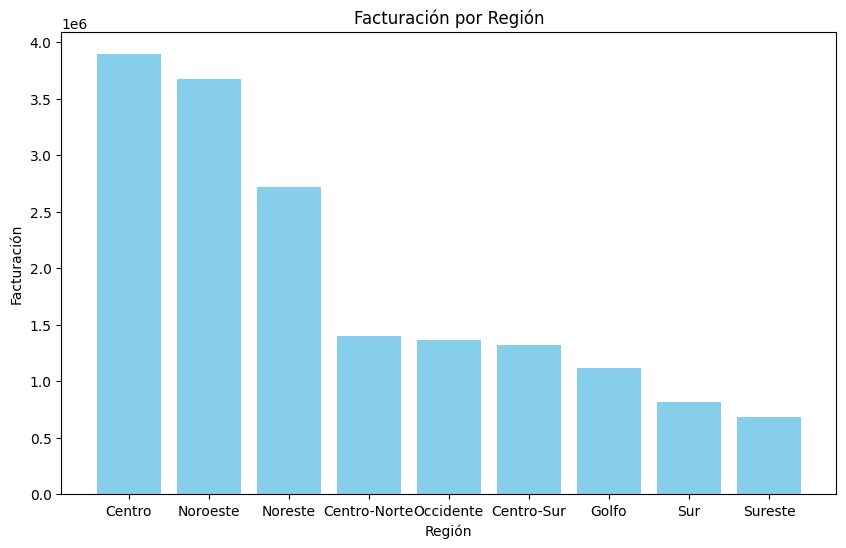

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df sea tu DataFrame
# Calcula la facturación para cada transacción
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Agrupa los datos por región y suma la facturación
facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

# Ordena el resultado para una mejor visualización
facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)

# Creación del gráfico de columnas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'], color='skyblue')  # Grafica barras
plt.title('Facturación por Región')  # Añade título al gráfico
plt.xlabel('Región')  # Añade etiqueta al eje X
plt.ylabel('Facturación')  # Añade etiqueta al eje Y
plt.show()  # Muestra el gráfico

## **Prompt_3**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de columnas apiladas que presente la cantidad de personas por sexo biológico en relación con los estados de "México" y "Puebla".

En "df", tenemos las siguientes columnas:

- estado: estado del/de la cliente. Utilizaremos únicamente los estados de "México" y "Puebla"
- sexo_biologico: sexo biológico del/de la cliente

Deseamos crear una visualización que presente la cantidad de personas agrupadas por sexo biológico en los estados que definimos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

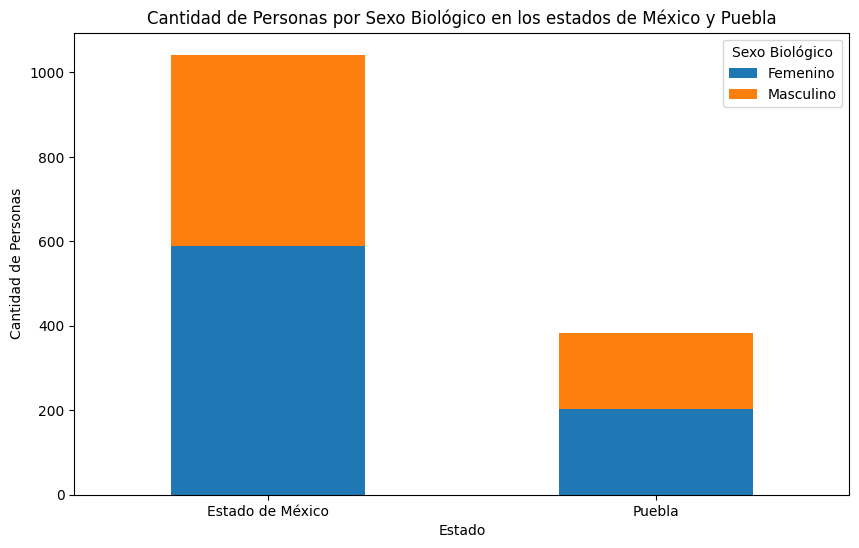

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo los estados de "México" y "Puebla"
df_filtrado = df[df['estado'].isin(['Estado de México', 'Puebla'])]

# Contar la cantidad de personas por sexo biológico y estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack(fill_value=0)

# Crear el gráfico de columnas apiladas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de Personas por Sexo Biológico en los estados de México y Puebla')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)  # Mantén las etiquetas de los estados en horizontal para mejor legibilidad

# Mostrar la leyenda y el gráfico
plt.legend(title='Sexo Biológico')
plt.show()

## **Prompt_4**

""" Tenemos un DataFrame llamado "df" y queremos construir una visualización que presente la proporción de los(as) usuarios(as) que realizaron el pre-registro en Zoop Pay, la nueva solución de Zoop.

En "df", tenemos la columna "zoop_pay" que contiene estos datos. Construye un gráfico de dona donde el valor "Sí" reciba el color #2a9d8f y "No" el color #edede9.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. """

Utilizando la respuesta de ChatGPT, obtenemos el siguiente código:

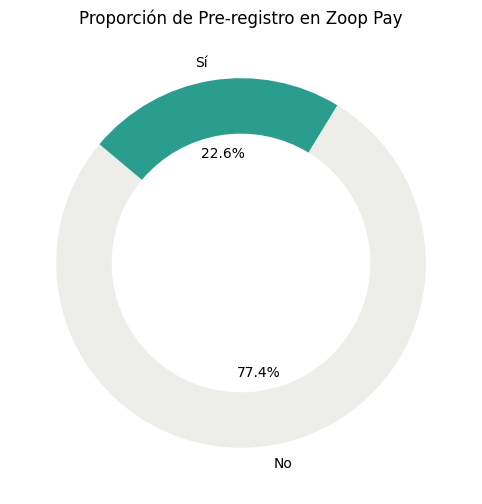

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Contabiliza la cantidad de usuarios que realizaron el pre-registro en Zoop Pay
pre_registro_counts = df['zoop_pay'].value_counts()

# Define los colores para cada valor
colors = ['#2a9d8f' if valor == 'Sí' else '#edede9' for valor in pre_registro_counts.index]

# Crea el gráfico de dona
plt.figure(figsize=(8, 6))
plt.pie(pre_registro_counts, labels=pre_registro_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Añade un título al gráfico
plt.title('Proporción de Pre-registro en Zoop Pay')

# Muestra el gráfico
plt.show()

El gráfico generado muestra que menos de ¼ de los clientes que realizaron compras en 2023 en Zoop están registrados para participar en Zoop Pay. Puede ser interesante investigar el perfil de los clientes que aún no han realizado el registro, en situaciones como edad, forma de pago, región de residencia, entre otros.

## **Prompt_5**

""" Tenemos un DataFrame llamado "df" y queremos construir una visualización que muestre la distribución de las edades de los(as) clientes por región.

En "df", tenemos las siguientes columnas:

region: región de la persona que realizó la compra.

edad: edad de la persona que realizó la compra.

Deseamos crear una visualización de boxplot que presente la distribución de estos datos. Coloca las edades en el eje x y las regiones en el eje y.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. """

Utilizando la respuesta de ChatGPT, obtenemos el siguiente código:

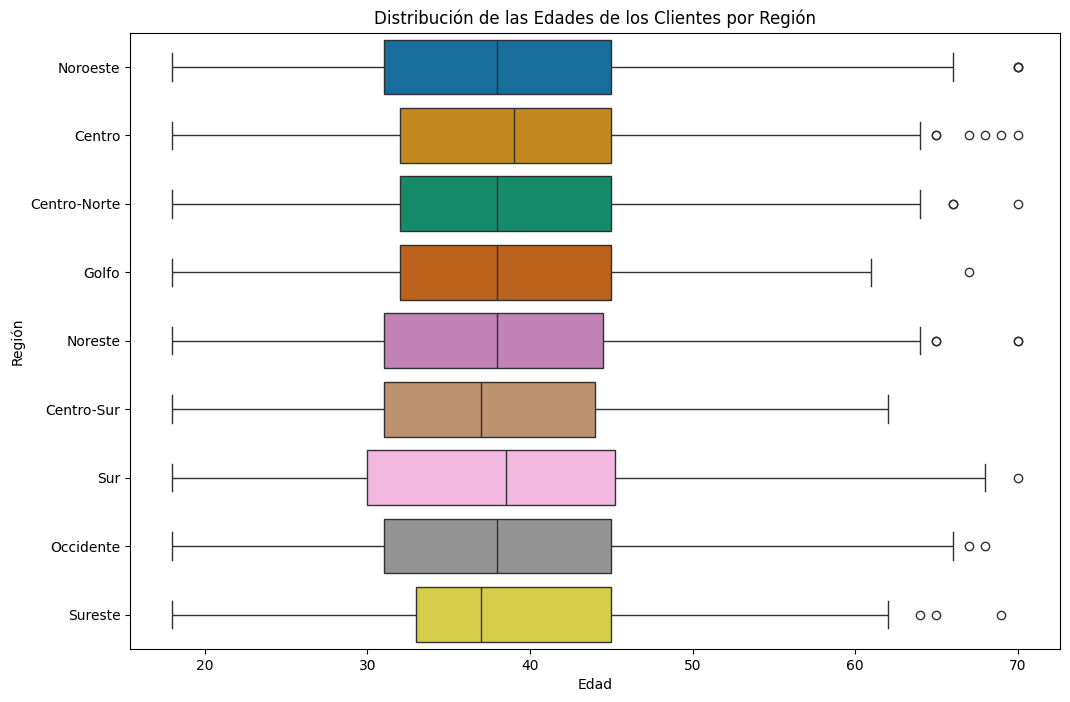

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creación del boxplot
plt.figure(figsize=(12, 8))  # Define el tamaño del gráfico
boxplot = sns.boxplot(x='edad', y='region', data=df,hue= 'region', palette="colorblind")  # Crea el boxplot

# Añade títulos y etiquetas a los ejes
plt.title('Distribución de las Edades de los Clientes por Región')  # Título del gráfico
plt.xlabel('Edad')  # Etiqueta del eje X
plt.ylabel('Región')  # Etiqueta del eje Y

# Muestra el gráfico
plt.show()

Este gráfico nos ofrece algunos insights interesantes. Por ejemplo, en las regiones Sur y Centro tenemos clientes con la mayor mediana de edad en comparación con otras, mientras que en la región Centro-Sur hay una mayor concentración de mediana de edad de clientes más jóvenes en relación a todas las regiones de México.

## **Prompt_6**

Podemos utilizar el siguiente prompt para la resolución del 1º desafío:

Vamos a refinar el gráfico que hicimos de facturación por región. Debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en color GRIS_1, las columnas en color AQUA_1, y el tamaño de la figura debe ser de (16, 9).

El título de la figura será "Facturación por Región en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser eliminadas, así como las etiquetas de los ejes x e y (xlabel y ylabel). Las etiquetas del eje X (xticks) deben tener un tamaño de 12 con el color AZUL_1. Retira todas las bordes del gráfico. Muestra el total de cada facturación encima de cada columna en el formato "MXN$ valor M", con el valor dividido por 1 millón (1e6) y con un decimal. El texto debe ser de color AZUL_1 y tamaño 12.

Usa las bibliotecas de visualización de datos de Python para crear esta visualización.

In [13]:
# ===============================
# Paleta (hex)
# ===============================
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"
BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = (
    "#ffffff", "#ebebeb", "#d9d9d9", "#cccccc", "#555655", "#231f20"
)
AQUA_1, AQUA_2, AQUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

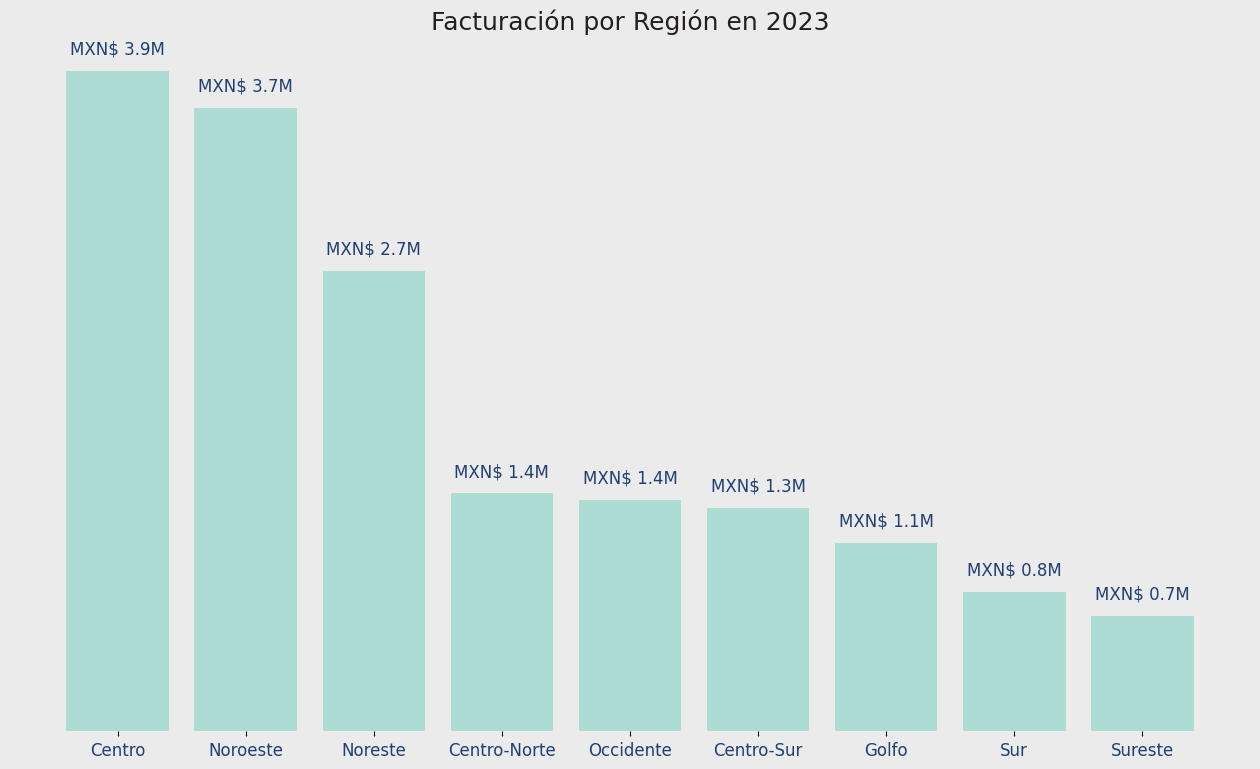

In [14]:
import matplotlib.pyplot as plt

# Ejemplo de datos agrupados por región y suma de la facturación
# facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

# Ordenación de los datos para una mejor visualización (suponiendo que los datos ya estén preparados)
# facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)

# Configuraciones generales de la figura
plt.figure(figsize=(16, 9), facecolor=GRIS_1)
plt.gca().set_facecolor(GRIS_1)  # Configuración del fondo del gráfico

# Creación del gráfico de columnas
plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'] / 1e6, color=AQUA_1)
plt.title('Facturación por Región en 2023', color=GRIS_5, fontsize=18)
plt.yticks([])  # Eliminación de las etiquetas del eje y
plt.ylabel('')  # Eliminación de la etiqueta del eje y
plt.xticks(fontsize=12, color=AZUL_1)
plt.box(False)  # Eliminación de los bordes del gráfico

# Añade el total de la facturación encima de cada columna
for index, value in enumerate(facturacion_por_region['facturacion']):
    plt.text(index, value / 1e6 + 0.1, f'MXN$ {value / 1e6:.1f}M', color=AZUL_1, ha='center', fontsize=12)

# Muestra el gráfico
plt.show()

## **Prompt_7**

Vamos a refinar el gráfico de rosquilla que producimos para mostrar la proporción de usuarios que realizaron el prerregistro en Zoop Pay.

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en color GRIS_1, la porción con valor "No" en color GRIS_3 y la porción con valor "Sí" en color AZUL_3. El tamaño de la figura será de (6, 6).

El título de la figura será "¿Prerregistrado(a) en Zoop Pay?" con tamaño 18 y color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tamaño de 12. Los porcentajes deben estar en color BLANCO, en negrita, y con un tamaño de 12.

La propiedad del ancho de la rosquilla (wedgeprops) debe ser de 0.4, la posición de los porcentajes dentro de la porción (pctdistance) debe ser de 0.8, el ángulo de inicio debe ser de 180 (startangle) y no debe haber explosión de porciones.

Usa las bibliotecas de visualización de datos de Python para crear esta visualización.

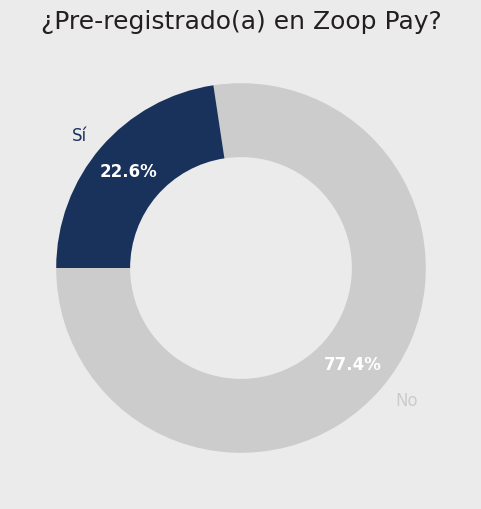

In [15]:
import matplotlib.pyplot as plt

# Contabiliza la cantidad de usuarios que realizaron el prerregistro en Zoop Pay
pre_registro_counts = df['zoop_pay'].value_counts()

# Define los colores para cada valor
colors = [AZUL_3 if label == 'Sí' else GRIS_3 for label in pre_registro_counts.index]

# Crea el gráfico de rosquilla
plt.figure(figsize=(6, 6), facecolor=GRIS_1)
plt.gca().set_facecolor(GRIS_1)  # Cambia el color del fondo del gráfico
patches, texts, autotexts = plt.pie(pre_registro_counts, labels=pre_registro_counts.index, autopct='%1.1f%%', startangle=180, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.8)

# Añade el título con el color y tamaño especificados
plt.title('¿Pre-registrado(a) en Zoop Pay?', color=GRIS_5, fontsize=18)

# Configura los colores y tamaños de las etiquetas de las porciones y porcentajes
for text, autotext, color in zip(texts, autotexts, [GRIS_3, AZUL_3]):
    text.set_color(color)  # Define el color de la etiqueta de la porción igual al color de la porción
    text.set_fontsize(12)
    autotext.set_color(BLANCO)  # Define el color de los porcentajes como blanco
    autotext.set_weight('bold')  # Define los porcentajes en negrita
    autotext.set_fontsize(12)
# Muestra el gráfico
plt.show()